This notebook is for the first set of exercices conducted in Python. Rename this file soon.

Import relevant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

%matplotlib inline
# Maybe set seed also

Define functions used in the code

In [48]:
i,j = 2*np.random.randint(N,size=(2,)) - 1

i,j = np.random.randint(0,N), np.random.randint(0,N)
print(i)
print(j)


644
846


In [51]:
# Initial state, randomly draws either -1 or +1 on a NxN array. N is the row/column length of the lattice
# Test for different configurations of the initial state
def initialstate(N):
    
    '''Generates a random spin configuration for initial condition'''
    
    state = 2*np.random.randint(2, size=(N,N)) - 1
    
    return state

# Monte Carlo move using Metropolis-Hastings
@nb.njit
def mcmove(config, beta, J, h):
    
    '''Monte Carlo move using Metropolis algorithm '''

    # Perform N^2 iterations, corresponding to one Monte Carlo update
    for _ in range(N*N):
                
            # Draw a random site, by drawing random row and column number
            i,j = np.random.randint(0,N), np.random.randint(0,N)

            # Define the lattice site chosen
            s =  config[i, j]

            # Compute energy of current configuration
            E_stay = -J*s*(config[(i + 1)%N, j] + config[i, (j + 1)%N] + config[(i - 1)%N, j] + config[i, (j - 1)%N]) - h*s

            # Energy when flipping the spin is just minus the current energy
            E_flip = - E_stay

            # Change in energy from flipping the spin
            Delta_E = E_flip - E_stay

            # Determine whether to flit the spin or not using Metropolis-Hastings
            if np.random.rand() < np.exp(-beta*Delta_E) :
                s *= -1

            config[i,j] = s
                
    return config

# Calculate energi of configuration
def calcEnergy(config):
    '''Energy of a given configuration'''
    
    # Initialize
    energy = 0
    
    # Loop over all sites
    for i in range(len(config)):
        for j in range(len(config)):
            
            s = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            
            # Energy is defined as 
            energy += -nb*s / 4.0 - h*s
            
    return energy

def calcMag(config):
    '''Magnetization of a given configuration'''
    
    # Magnetization is simply the sum of all spins in the lattice
    mag = np.sum(config)
    return mag

Define parameter values

In [57]:
N = 1000
n_max = 500
n_0 = 2500
J = 1.0
h = 0.0
beta =  1 / 2.27
# Define additional params here...

Run the algorithm

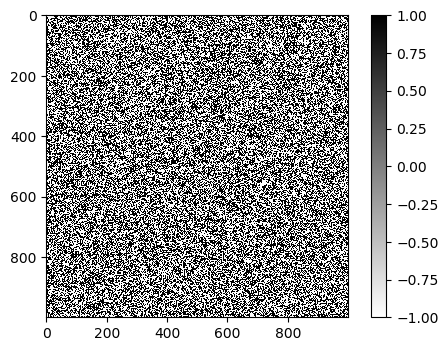

In [53]:
# Define initial state
config = initialstate(N)

# Test plot
plt.figure(dpi=100)
plt.imshow(config, cmap='binary')
plt.colorbar()

In [60]:
# Run Metropolis-Hastings
for i in range(n_max) :
    
#     print(i)
    mcmove(config, beta, J, h)

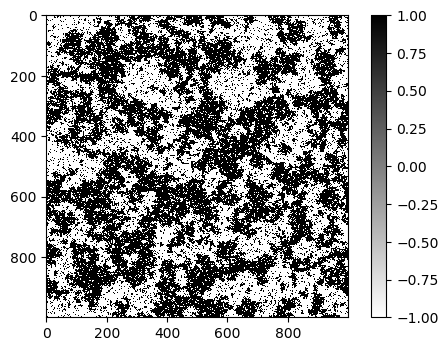

In [61]:
plt.figure(dpi=100)
plt.imshow(config, cmap='binary')
plt.colorbar()
plt.show()